## 数据读取

In [14]:
import pandas as pd
import jieba
from tqdm import tqdm_notebook
from wordcloud import WordCloud
import numpy as np
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('data/b1vzDs.csv')
df.shape

(2475, 7)

In [15]:
df.head()

,Unnamed: 0,index,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice
0,0,0,如家酒店(大连华南广场天河路枣园店),甘井子区,4.4,685,135.0
1,1,1,大连星海乐家时尚酒店式公寓,沙河口区,4.7,257,184.0
2,2,2,大连兴辉凯瑞酒店,普兰店区,4.7,215,143.0
3,3,3,大连雅客小镇假日酒店,金州区,4.5,20,192.0
4,4,4,大连智高商务主题宾馆,旅顺口区,4.3,441,111.0


## 数据清洗

In [16]:
#获取的数据会有重复的情况，首先根据酒店的名字将一项，将名称完全相同的项从数据表中删除
df = df.drop_duplicates(['HotelName'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2474
Data columns (total 7 columns):
Unnamed: 0            2219 non-null int64
index                 2219 non-null int64
HotelName             2219 non-null object
HotelLocation         2219 non-null object
HotelCommentValue     2219 non-null float64
HotelCommentAmount    2219 non-null int64
HotelPrice            2219 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 138.7+ KB


In [17]:
df_new_hotel = df[df["HotelCommentValue"]==0].drop(['Unnamed: 0'], axis=1).set_index(['index'])
df_new_hotel.head()

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice
index,,,,,
15,大连五号海宿,中山区,0.0,3,456.0
22,宜必思酒店(大连星海公园店),沙河口区,0.0,4,293.0
20,汉庭优佳酒店(大连辽师大地铁站店),沙河口区,0.0,3,238.0
14,大连一十合院住宿,甘井子区,0.0,1,551.0
24,大连茗园宾馆,大连市沙河口区,0.0,3,228.0


In [18]:
df_in_ana = df[df["HotelCommentValue"]!=0].drop(["Unnamed: 0", "index"], axis=1)
df_in_ana.shape

(1669, 5)

## 数据分析

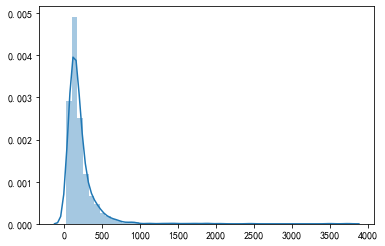

In [19]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
sns.distplot(df_in_ana['HotelPrice'].values)

In [20]:
df_in_ana['HotelLabel'] = df_in_ana["HotelPrice"].apply(lambda x: '奢华' if x > 1000 else \
                                                        ('高端' if x > 500 else \
                                                        ('舒适' if x > 300 else \
                                                        ('经济' if x > 100 else '廉价'))))

In [21]:
df_in_ana.head()

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel
0,如家酒店(大连华南广场天河路枣园店),甘井子区,4.4,685,135.0,经济
1,大连星海乐家时尚酒店式公寓,沙河口区,4.7,257,184.0,经济
2,大连兴辉凯瑞酒店,普兰店区,4.7,215,143.0,经济
3,大连雅客小镇假日酒店,金州区,4.5,20,192.0,经济
4,大连智高商务主题宾馆,旅顺口区,4.3,441,111.0,经济


In [22]:
label = df_in_ana.groupby('HotelLabel')['HotelName']
list(label)

[('奢华', 143             大连汤景泽日式温泉酒店
  320               大连辉盛阁国际公寓
  466              大连良运传琦温泉酒店
  590     大连欢墅度假别墅(金石滩鲁能优山美地)
  597            大连一方城堡豪华精选酒店
  634                  大连北马山庄
  750                大连四时海语民宿
  839              大连微家星海精品酒店
  1049                大连须来·海宿
  1402      大连夜泊拾间StayNight酒店
  1569                 大连鲸鹿海宿
  2209                 大连君悦酒店
  2213                大连康莱德酒店
  2214         大连金石滩鲁能希尔顿度假酒店
  2415             大连壹号聚会独栋别墅
  Name: HotelName, dtype: object), ('廉价', 6                  大连学子酒店
  11                 大连仲夏客舍
  22             大连优山美地时尚宾馆
  23                 大连文景旅店
  80      联合庭院青旅酒店(大连星海广场店)
                ...        
  1922               大连佳家客舍
  1971               大连辽B宾馆
  1996          大连向日葵校园短租住宿
  2014      小时快捷酒店(大连机场大纺店)
  2091             大连有家商务宾馆
  Name: HotelName, Length: 366, dtype: object), ('经济',
  0        如家酒店(大连华南广场天河路枣园店)
  1             大连星海乐家时尚酒店式公寓
  2                  大连兴辉凯瑞酒店
  3                大连雅客小镇假日酒店
  4                大连

([<matplotlib.patches.Wedge at 0x179c0d93a58>,
 [Text(1.0995615668223722, 0.0310541586125, '奢华'),
  Text(0.8817809341165916, 0.813917922292212, '廉价'),
  Text(-1.1653378183544278, -0.28633506441395257, '经济'),
  Text(0.9862461234793722, -0.6836070391108557, '舒适'),
  Text(1.1898928807304072, -0.15541857156431768, '高端')],
 [Text(0.5997608546303848, 0.016938631970454542, '0.9%'),
  Text(0.5143722115680117, 0.47478545467045696, '21.9%'),
  Text(-0.679780394040083, -0.16702878757480563, '62.0%'),
  Text(0.5753102386963004, -0.3987707728146658, '11.0%'),
  Text(0.6941041804260709, -0.09066083341251863, '4.1%')])

array([  15,  366, 1035,  184,   69], dtype=int64)

Index(['奢华', '廉价', '经济', '舒适', '高端'], dtype='object', name='HotelLabel')

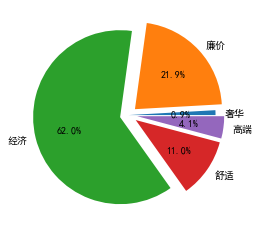

In [23]:
hotel_label = df_in_ana.groupby('HotelLabel')['HotelName'].count()
plt.pie(hotel_label.values, labels=hotel_label.index, autopct='%.1f%%', explode=[0, 0.1, 0.1, 0.1, 0.1], shadow=False)
hotel_label.values
hotel_label.index

## 大连酒店区域分布图

In [24]:
from pyecharts.charts import Map
from pyecharts import options as opts
from IPython.display import IFrame

hotel_distribution = df_in_ana.groupby('HotelLocation')['HotelName'].count().sort_values(ascending=False)
hotel_distribution = hotel_distribution[:8]

h_values = list(hotel_distribution.values)
district = list(hotel_distribution.index)

map_hotel = (
    Map()
    .add(series_name='酒店', data_pair=[[z[0],str(z[1])] for z in zip(district, h_values)], maptype='大连')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="大连酒店区域分布图"),
        visualmap_opts=opts.VisualMapOpts(max_=390, is_piecewise=True),
    )    
)
map_hotel.render('dalian_hotel.html')

'C:\\Users\\TERRYWANG-MSI\\Documents\\GitHub\\my-ipynb\\dalian_hotel.html'

In [25]:
for z in zip(district, h_values):
    [z[0],str(z[1])]

['沙河口区', '390']

['金州区', '312']

['中山区', '266']

['甘井子区', '256']

['西岗区', '149']

['旅顺口区', '92']

['高新园区', '73']

['普兰店区', '30']

In [26]:
IFrame('dalian_hotel.html', width=1000, height=600)

HotelLocation
沙河口区    390
金州区     312
中山区     266
甘井子区    256
西岗区     149
旅顺口区     92
高新园区     73
普兰店区     30
Name: HotelName, dtype: int64

,HotelLocation,HotelLabel,HotelName
0,沙河口区,经济,249
1,金州区,经济,202
2,甘井子区,经济,171
3,中山区,经济,161
4,沙河口区,廉价,74
...,...,...,...
107,海霞街245-3号区,舒适,1
108,港湾观海小区,廉价,1
109,港隆路25号绿地中心A2栋1117室区,经济,1
110,炮台镇炮台街道三家社区,经济,1


,HotelLocation,HotelLabel,HotelName
0,沙河口区,经济,249
1,金州区,经济,202
2,甘井子区,经济,171
3,中山区,经济,161
4,沙河口区,廉价,74
5,西岗区,经济,74
6,金州区,廉价,71
7,甘井子区,廉价,70
8,中山区,舒适,53
9,旅顺口区,经济,51


Text(0.5, 1.0, '高端型酒店的区域分布情况')

([<matplotlib.patches.Wedge at 0x179c0ed6ac8>,
 [Text(0.6799749020149729, 0.8646583907126144, '沙河口区'),
  Text(-0.8960335354884523, 0.6380626170526408, '中山区'),
  Text(-0.8646583907126145, -0.6799749020149727, '金州区'),
  Text(5.149471664411206e-08, -1.0999999999999988, '高新园区'),
  Text(0.6799749424925521, -0.8646583588806915, '西岗区'),
  Text(1.0212047599553087, -0.4088286172036159, '甘井子区'),
  Text(1.0888036000597223, -0.1565462247931533, '旅顺口区'),
  Text(1.0987540779274896, -0.05234000609201452, '普兰店区')],
 [Text(0.3708954010990761, 0.4716318494796078, '28.8%'),
  Text(-0.488745564811883, 0.3480341547559858, '22.7%'),
  Text(-0.47163184947960785, -0.370895401099076, '18.2%'),
  Text(2.8088027260424755e-08, -0.5999999999999993, '10.6%'),
  Text(0.37089542317775565, -0.47163183211674076, '10.6%'),
  Text(0.557020778157441, -0.22299742756560864, '6.1%'),
  Text(0.5938928727598485, -0.08538884988717453, '1.5%'),
  Text(0.599320406142267, -0.028549094232007917, '1.5%')])

Text(0.5, 1.0, '舒适型酒店的区域分布情况')

([<matplotlib.patches.Wedge at 0x179c0ed6780>,
 [Text(0.6235986842935357, 0.9061593021910503, '中山区'),
  Text(-1.0123808000526033, 0.43021519694781957, '沙河口区'),
  Text(-0.7340506709387895, -0.8192494201977278, '金州区'),
  Text(0.08029491002508791, -1.0970655073531677, '西岗区'),
  Text(0.6880805332791654, -0.8582221039580952, '高新园区'),
  Text(0.9872994264672323, -0.48501530130241705, '甘井子区'),
  Text(1.0882777162163373, -0.16016120749717594, '旅顺口区'),
  Text(1.0998165195289307, -0.020090380067826413, '普兰店区')],
 [Text(0.3401447368873831, 0.4942687102860274, '30.8%'),
  Text(-0.5522077091196017, 0.23466283469881064, '25.6%'),
  Text(-0.4003912750575215, -0.4468633201078515, '14.0%'),
  Text(0.04379722365004795, -0.5983993676471823, '11.6%'),
  Text(0.37531665451590834, -0.4681211476135064, '7.6%'),
  Text(0.5385269598912176, -0.26455380071040924, '6.4%'),
  Text(0.593606027027093, -0.08736065863482323, '3.5%'),
  Text(0.599899919743053, -0.010958389127905314, '0.6%')])

Text(0.5, 1.0, '经济型酒店的区域分布情况')

([<matplotlib.patches.Wedge at 0x179c0f62080>,
 [Text(0.7612717959518452, 0.7940184208746371, '沙河口区'),
  Text(-0.7055489976073729, 0.8439197900127899, '金州区'),
  Text(-1.0393595944791743, -0.36018277771721224, '甘井子区'),
  Text(-0.17735402404029146, -1.0856083778954158, '中山区'),
  Text(0.6203527440151311, -0.9083845402652434, '西岗区'),
  Text(0.9279963722657316, -0.5906121680609382, '旅顺口区'),
  Text(1.0632829441848892, -0.28183218518386804, '高新园区'),
  Text(1.0981312962815215, -0.0640909987990931, '普兰店区')],
 [Text(0.41523916142827916, 0.4331009568407111, '25.7%'),
  Text(-0.3848449077858397, 0.46031988546152175, '20.8%'),
  Text(-0.5669234151704586, -0.19646333330029755, '17.6%'),
  Text(-0.0967385585674317, -0.5921500243065904, '16.6%'),
  Text(0.3383742240082533, -0.4954824765083145, '7.6%'),
  Text(0.5061798394176718, -0.3221520916696026, '5.3%'),
  Text(0.5799725150099395, -0.153726646463928, '4.5%'),
  Text(0.598980707062648, -0.03495872661768714, '1.9%')])

Text(0.5, 1.0, '奢华型酒店的区域分布情况')

([<matplotlib.patches.Wedge at 0x179c0f62048>,
 [Text(0.6248711888047935, 0.9052822749848162, '沙河口区'),
  Text(-1.0680360276074794, 0.2632471153354504, '中山区'),
  Text(-0.13259018705856618, -1.0919797810837775, '金州区'),
  Text(0.8233619398770805, -0.7294347921245949, '西岗区'),
  Text(1.068036046092707, -0.26324704033788743, '普兰店区')],
 [Text(0.3408388302571601, 0.4937903318098996, '30.8%'),
  Text(-0.5825651059677159, 0.14358933563751838, '30.8%'),
  Text(-0.07232192021376337, -0.5956253351366059, '23.1%'),
  Text(0.44910651266022567, -0.39787352297705175, '7.7%'),
  Text(0.5825651160505674, -0.14358929472975676, '7.7%')])

Text(0.5, 1.0, '廉价型酒店的区域分布情况')

([<matplotlib.patches.Wedge at 0x179c0fb76d8>,
 [Text(0.8622277497455317, 0.6830543957612432, '沙河口区'),
  Text(-0.44042443562573114, 1.0079813076162456, '金州区'),
  Text(-1.0923899391953906, -0.12916741363320305, '甘井子区'),
  Text(-0.42210172444713606, -1.0157903987628325, '西岗区'),
  Text(0.36632676481006055, -1.0372100565381126, '旅顺口区'),
  Text(0.8922542763284863, -0.6433368529577096, '中山区'),
  Text(1.0672984977427125, -0.26622155569402933, '普兰店区'),
  Text(1.0963503668268657, -0.08953140878260224, '高新园区')],
 [Text(0.47030604531574455, 0.372575124960678, '21.3%'),
  Text(-0.24023151034130785, 0.5498079859724976, '20.5%'),
  Text(-0.5958490577429403, -0.07045495289083803, '20.2%'),
  Text(-0.23023730424389238, -0.5540674902342722, '13.5%'),
  Text(0.19981459898730572, -0.5657509399298796, '9.8%'),
  Text(0.4866841507246288, -0.35091101070420516, '9.5%'),
  Text(0.5821628169505704, -0.14521175765128871, '2.6%'),
  Text(0.5980092909964722, -0.048835313881419394, '2.6%')])

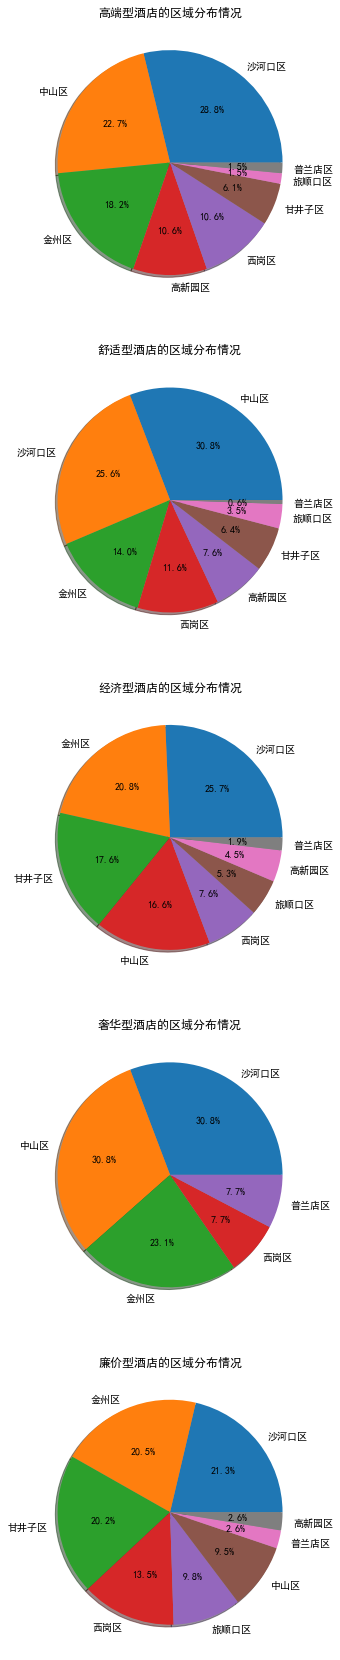

In [27]:
hotel_distribution = df_in_ana.groupby('HotelLocation')['HotelName'].count().sort_values(ascending=False)
hotel_distribution = hotel_distribution[:8]
hotel_distribution
hotel_label_distr = df_in_ana.groupby([ 'HotelLocation','HotelLabel'])['HotelName'].count().sort_values(ascending=False).reset_index()
hotel_label_distr
in_use_district = list(hotel_distribution.index)
hotel_label_distr = hotel_label_distr[hotel_label_distr['HotelLocation'].isin(in_use_district)]
hotel_label_distr

fig, axes = plt.subplots(5, 1, figsize=(30,30))
hotel_label_list = ['高端', '舒适', '经济', '奢华', '廉价']
for i in range(len(hotel_label_list)):
    current_df = hotel_label_distr[hotel_label_distr['HotelLabel']==hotel_label_list[i]]
    axes[i].set_title('{}型酒店的区域分布情况'.format(hotel_label_list[i]))
    axes[i].pie(current_df.HotelName, labels=current_df.HotelLocation, autopct='%.1f%%', shadow=True)

In [28]:
df_in_ana['HotelCommentLevel'] = df_in_ana["HotelCommentValue"].apply(lambda x: '超棒' if x > 4.6 \
                                                                      else ('还不错' if x > 4.0 \
                                                                      else ('一般般' if x > 3.0 else '差评' )))

Text(0.5, 1.0, '高端型酒店的评分情况')

([<matplotlib.patches.Wedge at 0x179c10f2518>,
 [Text(-0.12493817499668994, 1.0928817193221307, '还不错'),
  Text(-0.07506673958102797, -1.0974356403036465, '超棒'),
  Text(1.08180785246822, -0.1992279356367924, '一般般')],
 [Text(-0.06814809545273996, 0.5961173014484349, '53.6%'),
  Text(-0.04094549431692435, -0.5986012583474435, '40.6%'),
  Text(0.5900770104372108, -0.10866978307461402, '5.8%')])

Text(0.5, 1.0, '舒适型酒店的评分情况')

([<matplotlib.patches.Wedge at 0x179c110c550>,
 [Text(6.735557395310444e-17, 1.1, '还不错'),
  Text(-0.14978327851711162, -1.089754545517781, '超棒'),
  Text(1.0897545507766764, -0.14978324025579245, '一般般')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-0.08169997010024269, -0.594411570282426, '45.7%'),
  Text(0.5944115731509143, -0.08169994923043224, '4.3%')])

Text(0.5, 1.0, '经济型酒店的评分情况')

([<matplotlib.patches.Wedge at 0x179c111ae80>,
 [Text(-0.1282549050701439, 1.0924974504892213, '还不错'),
  Text(-0.33674171203969605, -1.0471891039218153, '超棒'),
  Text(0.9774406259202948, -0.5045887660268928, '一般般'),
  Text(1.098703006870586, -0.0534013360650574, '差评')],
 [Text(-0.06995722094735121, 0.5959077002668479, '53.7%'),
  Text(-0.18367729747619785, -0.5711940566846265, '32.7%'),
  Text(0.5331494323201608, -0.2752302360146688, '12.1%'),
  Text(0.5992925492021378, -0.0291280014900313, '1.5%')])

Text(0.5, 1.0, '奢华型酒店的评分情况')

([<matplotlib.patches.Wedge at 0x179c11416d8>,
 [Text(0.11498130276606913, 1.0939740856227893, '超棒'),
  Text(-0.33991867422268845, -1.0461621742897658, '还不错'),
  Text(1.0759623690153899, -0.22870282128297006, '一般般')],
 [Text(0.0627170742360377, 0.5967131376124304, '46.7%'),
  Text(-0.18541018593964823, -0.5706339132489631, '46.7%'),
  Text(0.5868885649174853, -0.12474699342707457, '6.7%')])

Text(0.5, 1.0, '廉价型酒店的评分情况')

([<matplotlib.patches.Wedge at 0x179c115c320>,
 [Text(-0.09430357484258389, 1.0959501976695425, '还不错'),
  Text(-0.7118766847196352, -0.8385890446175536, '一般般'),
  Text(0.6218791993990773, -0.9073402125745132, '超棒'),
  Text(1.0821777567952728, -0.19720877946367224, '差评')],
 [Text(-0.0514383135505003, 0.5977910169106595, '52.7%'),
  Text(-0.3882963734834373, -0.45741220615502914, '22.1%'),
  Text(0.3392068360358603, -0.4949128432224617, '19.4%'),
  Text(0.5902787764337851, -0.10756842516200303, '5.7%')])

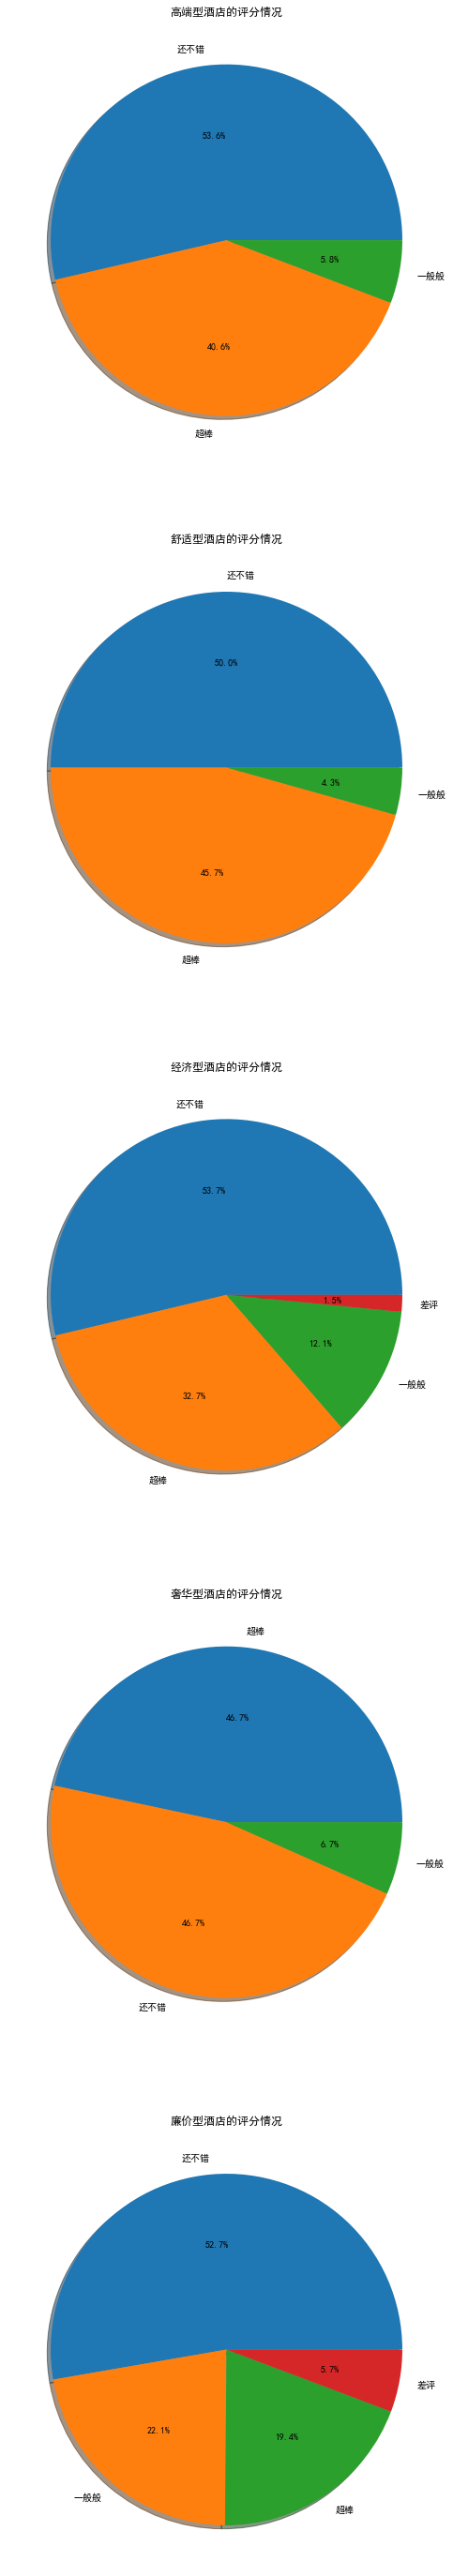

In [29]:
hotel_label_level = df_in_ana.groupby(['HotelCommentLevel','HotelLabel'])['HotelName'].count().sort_values(ascending=False).reset_index()
fig, axes = plt.subplots(5, 1, figsize=(50,50))
for i in range(len(hotel_label_list)):
    current_df = hotel_label_level[hotel_label_level['HotelLabel'] == hotel_label_list[i]]
    axes[i].set_title('{}型酒店的评分情况'.format(hotel_label_list[i]))
    axes[i].pie(current_df.HotelName, labels=current_df.HotelCommentLevel, autopct='%.1f%%', shadow=True)

## 酒店清单

In [36]:
# 廉价酒店
df_pos_cheap = df_in_ana[(df_in_ana['HotelLabel']=='廉价') \
                         & (df_in_ana['HotelCommentValue']> 4.6) \
                         & (df_in_ana['HotelCommentAmount']> 500)].sort_values(by=['HotelPrice'], ascending=False)[:10]
df_pos_cheap

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel,HotelCommentLevel
827,大连都市精品酒店,西岗区,4.8,2756,90.0,廉价,超棒
506,大连北站好运来宾馆,甘井子区,4.7,824,78.0,廉价,超棒
844,联合庭院青旅酒店(大连火车站店),西岗区,4.7,2186,48.0,廉价,超棒
265,巴斯光年国际青年旅舍(大连星海店),沙河口区,4.7,1030,39.0,廉价,超棒
225,大懒虫青年客栈(大连星海店),沙河口区,4.8,1008,37.0,廉价,超棒
984,云杉庭院青旅酒店(大连老虎滩海洋公园店),西岗区,4.7,576,37.0,廉价,超棒


In [35]:
# 经济型酒店
df_pos_economy = df_in_ana[(df_in_ana['HotelLabel']=='经济') \
                         & (df_in_ana['HotelCommentValue']> 4.6) \
                         & (df_in_ana['HotelCommentAmount']> 2000)].sort_values(by=['HotelPrice'])[:10]
df_pos_economy

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel,HotelCommentLevel
59,宜家微酒店(大连火车站中山广场店),西岗区,4.9,4171,109.0,经济,超棒
846,天连锁酒店(大连西安路商业中心兴工街地铁站店),沙河口区,4.7,2237,159.0,经济,超棒
98,大连宜客宜家精品酒店机场金三角店,甘井子区,4.9,2709,188.0,经济,超棒
2215,锦江之星(大连交通大学西山街店),沙河口区,4.7,2796,199.0,经济,超棒
67,锦江之星(大连联合路店),沙河口区,4.7,2225,213.0,经济,超棒
128,天优品酒店(大连旅顺中心广场新玛特店),旅顺口区,4.7,2443,233.0,经济,超棒
61,宜客宜家酒店(大连东北财经大学店)(原宜客宜家主题公寓),沙河口区,4.9,5733,240.0,经济,超棒
127,麗枫酒店(大连马栏广场辽师大学店),沙河口区,4.8,2218,242.0,经济,超棒
1107,大连国尊王朝大饭店,金州区,4.7,2184,248.0,经济,超棒
29,精选 Q加·大连星海广场飞悦酒店公寓,沙河口区,4.7,10677,257.0,经济,超棒


In [37]:
# 舒适型酒店
df_pos_comfortable = df_in_ana[(df_in_ana['HotelLabel']=='舒适') \
                         & (df_in_ana['HotelCommentValue']> 4.6) \
                         & (df_in_ana['HotelCommentAmount']> 1000)].sort_values(by=['HotelPrice'])[:10]
df_pos_comfortable

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel,HotelCommentLevel
840,喜莱德海景公寓式酒店(大连国际会议中心店),中山区,4.8,1378,303.0,舒适,超棒
53,如家精选酒店(大连开发区万达广场金马路店),金州区,4.8,1084,309.0,舒适,超棒
70,大连凯伦饭店,金州区,4.7,1560,319.0,舒适,超棒
31,精选 山水S酒店(大连火车站青泥洼桥店),西岗区,4.8,1163,328.0,舒适,超棒
1399,悠然居酒店式公寓(大连星海广场店),沙河口区,4.8,2723,333.0,舒适,超棒
100,麗枫酒店(大连星海公园店),沙河口区,4.7,2052,338.0,舒适,超棒
832,大连亿锋豪景酒店,金州区,4.7,2663,350.0,舒适,超棒
38,精选 Q加·港悦酒店式公寓(大连星海广场店),沙河口区,4.7,3404,359.0,舒适,超棒
185,桔子酒店·精选(大连希望广场店),西岗区,4.8,4265,362.0,舒适,超棒
41,桔子酒店·精选(大连中山广场人民路店),中山区,4.8,8019,371.0,舒适,超棒


In [38]:
# 高端酒店
df_pos_hs = df_in_ana[(df_in_ana['HotelLabel']=='高端') \
                         & (df_in_ana['HotelCommentValue']> 4.6) \
                         & (df_in_ana['HotelCommentAmount']> 1000)].sort_values(by=['HotelPrice'])[:10]
df_pos_hs

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel,HotelCommentLevel
44,美丽豪酒店(大连高新万达广场店),高新园区,4.9,2303,508.0,高端,超棒
162,全季酒店(大连和平广场店),沙河口区,4.7,1027,518.0,高端,超棒
837,宜客宜家精品主题酒店(大连星海公园海景店),沙河口区,4.9,6349,526.0,高端,超棒
838,大连雅乐轩酒店,中山区,4.7,2051,649.0,高端,超棒
310,精选 大连国际金融会议中心海景酒店,西岗区,4.8,1391,697.0,高端,超棒
1379,星海金色阳光酒店式公寓(大连星海广场店),沙河口区,4.9,1396,784.0,高端,超棒
25,大连新世界酒店,中山区,4.7,2687,816.0,高端,超棒
595,大连香格里拉大酒店,中山区,4.7,5034,865.0,高端,超棒


In [39]:
# 奢华酒店
df_pos_luxury = df_in_ana[(df_in_ana['HotelLabel']=='奢华') \
                         & (df_in_ana['HotelCommentValue']> 4.6) \
                         & (df_in_ana['HotelCommentAmount']> 500)].sort_values(by=['HotelPrice'])[:10]
df_pos_luxury

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel,HotelCommentLevel
2213,大连康莱德酒店,中山区,4.7,1177,1139.0,奢华,超棒
2209,大连君悦酒店,沙河口区,4.7,3363,1587.0,奢华,超棒
143,大连汤景泽日式温泉酒店,经济技术开发区,4.7,594,1878.0,奢华,超棒
320,大连辉盛阁国际公寓,中山区,4.7,803,2050.0,奢华,超棒


In [41]:
# 雷区清单
df_neg = df_in_ana[(df_in_ana['HotelCommentValue'] < 3.0) \
                         & (df_in_ana['HotelCommentAmount'] > 50)].sort_values(by=['HotelPrice'], ascending=False)
df_neg

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,HotelLabel,HotelCommentLevel
1883,大连万兴宾馆,西岗区,2.8,52,138.0,经济,差评
1033,大连佳怡商务宾馆,沙河口区,2.4,55,131.0,经济,差评
1907,大连郡豪酒店式公寓火车站店,中山区,2.2,51,71.0,廉价,差评
1857,大连鸿府旅馆,甘井子区,2.7,60,66.0,廉价,差评
1879,大连大洋旅馆,中山区,2.9,61,25.0,廉价,差评


## 酒店名字的科学

In [45]:
from wordcloud import WordCloud

def get_word_map(hotel_name_list):
    word_dict ={}
    for hotel_name in tqdm_notebook(hotel_name_list):
        hotel_name = hotel_name.replace('(', '')
        hotel_name = hotel_name.replace(')', '')
        word_list = list(jieba.cut(hotel_name, cut_all=False))
        for word in word_list:
            if word == '大连' or len(word) < 2:
                continue
            if word not in word_dict:
                word_dict[word] = 0
            word_dict[word] += 1

    font_path = 'data/fonts/SourceHanSerifK-Light.otf'
    wc = WordCloud(font_path=font_path, background_color='white', max_words=1000, 
                            max_font_size=120, random_state=42, width=800, height=600, margin=2)
    wc.generate_from_frequencies(word_dict)

    return wc

Text(0.5, 1.0, '价格较低酒店的名字词云')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\TERRYW~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.713 seconds.
Prefix dict has been built succesfully.


Text(0.5, 1.0, '价格较高酒店的名字词云')

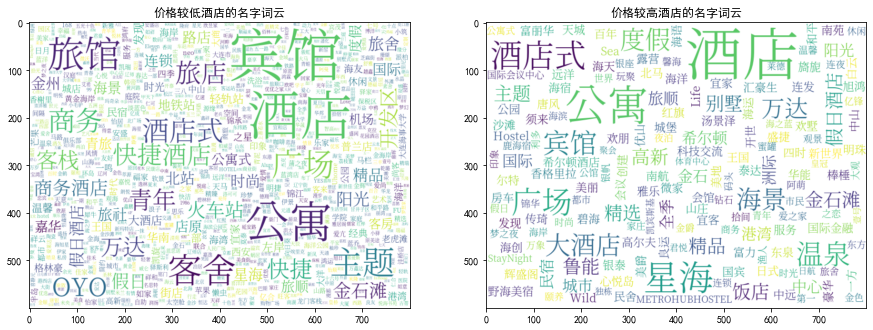

In [46]:
part1 = df_in_ana[df_in_ana['HotelPrice'] <= 150]['HotelName'].values
part2 = df_in_ana[df_in_ana['HotelPrice'] > 500]['HotelName'].values
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].set_title('价格较低酒店的名字词云')
axes[0].imshow(get_word_map(part1), interpolation='bilinear')
axes[1].set_title('价格较高酒店的名字词云')
axes[1].imshow(get_word_map(part2), interpolation='bilinear')

## 看名识酒店

In [47]:
df_in_ana['HotelPrice'].median()

156.0

In [52]:
df_in_ana['PriceLabel'] = df_in_ana['HotelPrice'].apply(lambda x:1 if x <= 150 else 0)
df_new_hotel['PriceLabel'] = df_new_hotel['HotelPrice'].apply(lambda x:1 if x <= 150 else 0)
# 设定分词方式
def word_cut(x):
    x = x.replace('（', '')  # 去掉名称中出现的（）
    x = x.replace('）', '')
    x = x.replace('(', '')  # 去掉名称中出现的()
    x = x.replace(')', '')    
    return jieba.lcut(x)

#设置训练集和测试集
x_train = df_in_ana['HotelName'].apply(word_cut).values
y_train = df_in_ana['PriceLabel'].values
x_test = df_new_hotel['HotelName'].apply(word_cut).values
y_test = df_new_hotel['PriceLabel'].values
x_train
y_train
x_test 
y_test 

array([list(['如', '家', '酒店', '大连', '华南', '广场', '天河路', '枣园', '店']),
       list(['大连', '星海', '乐家', '时尚', '酒店式', '公寓']),
       list(['大连', '兴辉', '凯瑞', '酒店']), ..., list(['大连', '瑞诗', '酒店']),
       list(['大连', '万向', '城', '公寓式', '酒店']),
       list(['大连', '壹号', '聚会', '独栋', '别墅'])], dtype=object)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

array([list(['大连', '五号', '海宿']),
       list(['宜必思', '酒店', '大连', '星海', '公园', '店']),
       list(['汉庭', '优佳', '酒店', '大连', '辽', '师大', '地铁站', '店']),
       list(['大连', '一十', '合院', '住宿']), list(['大连', '茗', '园', '宾馆']),
       list(['爱佳', '家庭', '公寓']), list(['大连经济技术开发区', '喜盈门', '宾馆']),
       list(['大连', '百盛', '酒店式', '公寓']), list(['大连', '蜗牛', '小居', '客舍']),
       list(['大连', '凯旋', '之旅', '温泉', '度假', '别墅', '1', '1号店']),
       list(['大连', '糖糖', '公寓式', '酒店', '火车站', '店']),
       list(['大连', '漫庭', '主题', '宾馆']),
       list(['大连', '钻石', '湾', '酒店式', '公寓']),
       list(['大连', '惜缘', '居', '公寓', '19', '号店']),
       list(['大连', '怡海', '客舍']), list(['大连', '博源汇', '公寓']),
       list(['大连', '浪漫', '四季', '假日酒店']), list(['大连', '百舟', '大酒店']),
       list(['大连', '旅顺', '蓝湾', '休闲', '度假', '公寓']),
       list(['大连', '星海', '温鑫', '酒店', '公寓', '星雨', '街东', '分店']),
       list(['大连', '天沐觅境', '客栈']), list(['大连', '北欧', '青旅', '酒店']),
       list(['大连', '百年', '港湾', '公寓', '2', '号店']),
       list(['大连', '金州', '瑞柏', '公寓']),

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

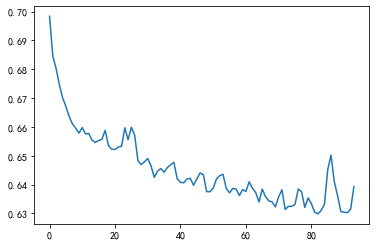

In [53]:
# 通过Word2Vec方法建立词向量浅层神经网络模型，并对分词之后的酒店名称进行词向量的求和计算
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings('ignore')
w2v_model = Word2Vec(size=200, min_count=10)
w2v_model.build_vocab(x_train)
w2v_model.train(x_train, total_examples=w2v_model.corpus_count, epochs=5)

def sum_vec(text):
    vec = np.zeros(200).reshape((1, 200))
    for word in text:
        try:
            vec += w2v_model[word].reshape((1, 200)) 
        except KeyError:
            continue
    return vec 

train_vec = np.concatenate([sum_vec(text) for text in tqdm_notebook(x_train)])
# 构建神经网络分类器模型，并使用training data对模型进行训练
from sklearn.externals import joblib
from sklearn.neural_network import MLPClassifier
from IPython import display 

model = MLPClassifier(hidden_layer_sizes=(100, 50, 20), learning_rate='adaptive')
model.fit(train_vec, y_train)

# 绘制损失变化曲线，监控损失函数的变化过程
display.clear_output(wait=True)
plt.plot(model.loss_curve_)

In [54]:
# 之后对测试集进行词向量求和
test_vec = np.concatenate([sum_vec(text) for text in tqdm_notebook(x_test)])
# 用训练好的模型进行预测， 将结果倒入测试用表中
y_pred = model.predict(test_vec)
df_new_hotel['PredLabel'] = pd.Series(y_pred)
# 建模预测的结果
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7345454545454545

In [55]:
new_hotel_questionable = df_new_hotel[(df_new_hotel['PriceLabel'] ==0) & (df_new_hotel['PredLabel']==1)]
new_hotel_questionable = new_hotel_questionable.sort_values(by='HotelPrice', ascending=False)
new_hotel_questionable

,HotelName,HotelLocation,HotelCommentValue,HotelCommentAmount,HotelPrice,PriceLabel,PredLabel
index,,,,,,,
14,大连金石滩金湾桥别墅,金海岸花园(大门左边那栋)区,0.0,0,4305.0,0,1
14,大连海边休闲别墅NO.,优山美地丽山环路区,0.0,0,2576.0,0,1
20,大连十年磨一剑度假别墅(11号店),蓝海湾(蓝海湾度假村)区,0.0,5,1920.0,0,1
17,大连金石滩19号日租聚会别墅(中心大街分店),金州区,0.0,1,1888.0,0,1
17,大连风舞九天海边度假别墅,金州区,0.0,0,1821.0,0,1
...,...,...,...,...,...,...,...
14,思家思家公寓(大连辽河西路店),金州区,0.0,6,159.0,0,1
14,大连主题民宿,沙河口区,0.0,0,156.0,0,1
20,大连开发区金丰亿家橼酒店公寓,金州区,0.0,0,155.0,0,1


<Figure size 1080x504 with 0 Axes>

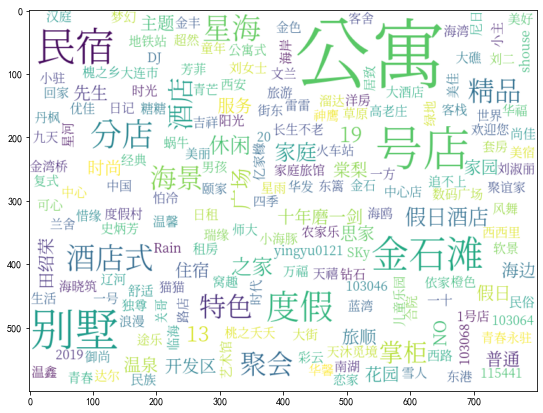

In [56]:
plt.figure(figsize=(15, 7))
plt.imshow(get_word_map(new_hotel_questionable['HotelName'].values), interpolation='bilinear')

## 认识新酒店

([<matplotlib.patches.Wedge at 0x179c6f2e9e8>,
 [Text(0.4952241217848982, 0.9822184427113841, '金州区'),
  Text(-1.0502523061308453, 0.32706282801144143, '甘井子区'),
  Text(-0.7189197652449374, -0.8325589295300148, '沙河口区'),
  Text(0.10878704263418966, -1.0946074087794706, '旅顺口区'),
  Text(0.6457239222346646, -0.8905282793117134, '中山区'),
  Text(0.9702662169179598, -0.5182503915171803, '西岗区'),
  Text(1.0890040760087287, -0.1551454879665377, '普兰店区')],
 [Text(0.2701222482463081, 0.5357555142062095, '35.1%'),
  Text(-0.5728648942531882, 0.17839790618805892, '20.1%'),
  Text(-0.39213805376996586, -0.4541230524709171, '16.8%'),
  Text(0.059338386891376174, -0.597058586606984, '9.0%'),
  Text(0.35221304849163515, -0.48574269780638907, '7.8%'),
  Text(0.5292361183188871, -0.2826820317366438, '6.6%'),
  Text(0.5940022232774883, -0.08462481161811146, '4.5%')])

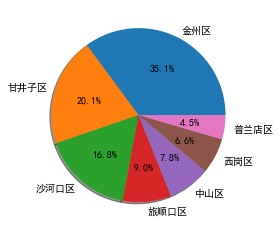

In [57]:
new_hotel_distri = df_new_hotel.groupby('HotelLocation')['HotelName'].count().sort_values(ascending=False)[:7]
plt.pie(new_hotel_distri.values, labels=new_hotel_distri.index, autopct='%.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x179c6faa208>,
 [Text(1.0859612910752763, 0.17518011955161772, '奢华'),
  Text(0.6137971106588083, 1.0311416522218948, '廉价'),
  Text(-1.1999216970224413, 0.01370842860376746, '经济'),
  Text(0.46080283077562195, -1.1079985339111122, '舒适'),
  Text(1.1494416996723409, -0.3446502271207151, '高端')],
 [Text(0.5923425224046961, 0.09555279248270056, '5.1%'),
  Text(0.3580483145509714, 0.6014992971294385, '22.7%'),
  Text(-0.6999543232630907, 0.007996583352197684, '44.0%'),
  Text(0.26880165128577943, -0.6463324781148153, '18.9%'),
  Text(0.6705076581421987, -0.20104596582041712, '9.3%')])

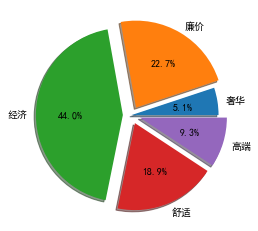

In [58]:
df_new_hotel['HotelLabel'] = df_new_hotel["HotelPrice"].apply(lambda x: '奢华' if x > 1000 \
                                                              else ('高端' if x > 500 \
                                                              else ('舒适' if x > 300 \
                                                              else('经济' if x > 100 \
                                                              else '廉价')))) 
new_hotel_label = df_new_hotel.groupby('HotelLabel')['HotelName'].count()
plt.pie(new_hotel_label.values, labels=new_hotel_label.index, autopct='%.1f%%', explode=[0, 0.1, 0.1, 0.1, 0.1], shadow=True)

Text(0.5, 1.0, '新开各档次酒店均价变化')

<BarContainer object of 5 artists>

(-18, 18)

Text(0, -8.449788385975902, '-8.4%')

Text(1, -13.439588688946023, '-13.4%')

Text(2, 10.951084009990522, '11.0%')

Text(3, 1.291667206887173, '1.3%')

Text(4, 3.7824167535550304, '3.8%')

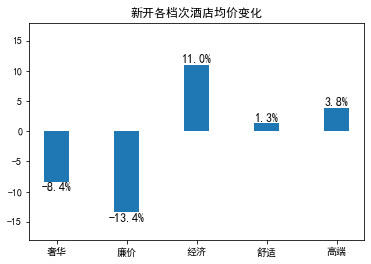

In [59]:
df2 = df_new_hotel.groupby('HotelLabel')['HotelPrice'].mean().reset_index()
df1=df_in_ana.groupby('HotelLabel')['HotelPrice'].mean().reset_index()
price_change_percent = (df2['HotelPrice'] -  df1['HotelPrice'])/df1['HotelPrice'] * 100
plt.title('新开各档次酒店均价变化')
plt.bar(df1['HotelLabel'] ,price_change_percent, width = 0.35)
plt.ylim(-18, 18)
for x, y in enumerate(price_change_percent):
    if y < 0:
        plt.text(x, y, '{:.1f}%'.format(y), ha='center', fontsize=12, va='top')
    else:
        plt.text(x, y, '{:.1f}%'.format(y), ha='center', fontsize=12, va='bottom')